In [64]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [65]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_NW_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,NaN,NaN,0.0084,NaN,NaN
1,0.0453,0.0523,0.0843,0.0689,0.1183,NaN,0.2156,0.3481,NaN,0.2872,...,0.0125,0.0084,0.0089,NaN,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,NaN,0.6194,...,NaN,NaN,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,NaN,NaN,...,NaN,0.0121,NaN,0.0150,0.0085,0.0073,NaN,NaN,0.0040,NaN
4,0.0762,NaN,0.0481,0.0394,0.0590,NaN,0.1209,0.2467,NaN,NaN,...,0.0156,NaN,0.0054,0.0105,0.0110,0.0015,0.0072,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,NaN,NaN,0.0177,0.0393,NaN,0.2028,0.1694,0.2328,NaN,...,NaN,NaN,0.0098,NaN,0.0033,0.0101,0.0065,0.0115,NaN,NaN
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,NaN,...,0.0051,0.0061,0.0093,NaN,0.0063,0.0063,NaN,NaN,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,NaN,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,NaN,0.2354,...,NaN,0.0086,NaN,0.0126,0.0036,NaN,0.0034,0.0079,0.0036,NaN


In [66]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	41
float64		column 2	82
float64		column 3	41
float64		column 4	41
float64		column 5	0
float64		column 6	41
float64		column 7	41
float64		column 8	41
float64		column 9	41
float64		column 10	41
float64		column 11	0
float64		column 12	41
float64		column 13	0
float64		column 14	0
float64		column 15	82
float64		column 16	41
float64		column 17	41
float64		column 18	41
float64		column 19	0
float64		column 20	41
float64		column 21	41
float64		column 22	0
float64		column 23	41
float64		column 30	0
float64		column 25	41
float64		column 26	41
float64		column 27	41
float64		column 28	82
float64		column 29	41
float64		column 30	0
float64		column 31	0
float64		column 32	0
float64		column 33	41
float64		column 34	82
float64		column 35	82
float64		column 36	41
float64		column 37	41
float64		column 38	41
float64		column 39	82
float64		column 40	0
float64		column 41	41
float64		column 42	41
float64		column 43	0
float64		column 44	41
float64		column

In [67]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,167.000000,126.000000,167.000000,167.000000,208.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,126.000000,126.000000,126.000000,126.000000,208.000000,167.000000,126.000000,167.000000,167.000000,167.000000
mean,0.030768,0.037952,0.043092,0.054062,0.075202,0.102952,0.121910,0.135169,0.176135,0.208775,...,0.014787,0.012393,0.009985,0.010390,0.009290,0.008275,0.007742,0.008075,0.007963,0.006314
std,0.023761,0.030946,0.034906,0.047326,0.055552,0.056780,0.059557,0.082138,0.114824,0.132476,...,0.010715,0.007116,0.005341,0.005644,0.007088,0.005712,0.005018,0.006657,0.006330,0.004267
min,0.001500,0.000600,0.002400,0.006100,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001100,0.000600,0.000400,0.000700,0.000300,0.000100,0.000600
25%,0.017000,0.018725,0.021550,0.025700,0.038050,0.069000,0.084700,0.087450,0.099900,0.111150,...,0.008900,0.007800,0.006050,0.006925,0.004150,0.004800,0.004225,0.003600,0.004150,0.003150
50%,0.023800,0.032850,0.038000,0.044500,0.062500,0.092100,0.113600,0.113800,0.156900,0.188200,...,0.013900,0.011800,0.009650,0.009900,0.007500,0.007100,0.006650,0.006100,0.006600,0.005400
75%,0.036400,0.044675,0.055050,0.061300,0.100275,0.125850,0.152850,0.167600,0.219600,0.262850,...,0.018100,0.015000,0.012875,0.013575,0.012100,0.010100,0.009575,0.010350,0.009400,0.007900
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.044400,0.026200,0.029000,0.044700,0.039400,0.031600,0.044000,0.036400,0.023100


<AxesSubplot:>

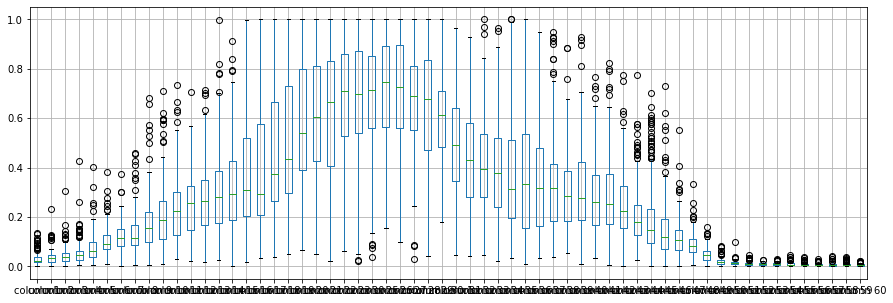

In [68]:
df.boxplot(return_type='axes', figsize=(15,5))

In [69]:
df.mean()

column 1       0.030768
column 2       0.037952
column 3       0.043092
column 4       0.054062
column 5       0.075202
column 6       0.102952
column 7       0.121910
column 8       0.135169
column 9       0.176135
column 10      0.208775
column 11      0.236013
column 12      0.252069
column 13      0.273305
column 14      0.296568
column 15      0.321701
column 16      0.369700
column 17      0.396383
column 18      0.452981
column 19      0.504812
column 20      0.568978
column 21      0.612862
column 22      0.624275
column 23      0.666026
column 30      0.672654
column 25      0.676460
column 26      0.703693
column 27      0.709152
column 28      0.663542
column 29      0.639920
column 30.1    0.603228
column 31      0.504475
column 32      0.439040
column 33      0.417656
column 34      0.406935
column 35      0.367044
column 36      0.380792
column 37      0.352182
column 38      0.336500
column 39      0.316301
column 40      0.311207
column 41      0.284116
column 42      0

In [70]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.804970,0.532282,0.525021,0.403396,0.312967,0.258443,0.366246,0.450012,0.321664,...,0.343227,0.337520,0.188200,0.223291,0.330702,0.256450,0.216470,0.345630,0.287945,0.395527
column 2,0.804970,1.000000,0.822216,0.728493,0.497609,0.331109,0.208246,0.268869,0.285078,0.278522,...,0.158700,0.457333,0.286338,0.348543,0.372759,0.370434,0.350552,0.386099,0.352272,0.571072
column 3,0.532282,0.822216,1.000000,0.761683,0.511709,0.363365,0.158661,0.210882,0.244687,0.208004,...,0.139060,0.479402,0.364367,0.352087,0.302132,0.409072,0.372536,0.354496,0.423173,0.481943
column 4,0.525021,0.728493,0.761683,1.000000,0.747153,0.346435,0.166670,0.233569,0.133918,0.099792,...,0.167615,0.509730,0.273800,0.212883,0.260801,0.278089,0.322447,0.296878,0.381118,0.377650
column 5,0.403396,0.497609,0.511709,0.747153,1.000000,0.553676,0.307155,0.176822,0.188987,0.158629,...,0.079607,0.466572,0.296576,0.105028,0.196472,0.292682,0.155828,0.252668,0.258091,0.304738
column 6,0.312967,0.331109,0.363365,0.346435,0.553676,1.000000,0.722306,0.449866,0.361102,0.365467,...,0.108503,0.290193,0.222783,0.186394,0.122846,0.162248,0.266177,0.216922,0.197054,0.173820
column 7,0.258443,0.208246,0.158661,0.166670,0.307155,0.722306,1.000000,0.605352,0.434489,0.361980,...,0.019359,0.080687,-0.007941,0.092434,0.140985,0.232337,0.273720,0.269256,0.112667,0.186931
column 8,0.366246,0.268869,0.210882,0.233569,0.176822,0.449866,0.605352,1.000000,0.758868,0.612615,...,0.142115,0.195164,0.063947,0.075470,0.171512,0.297344,0.319442,0.239557,0.157809,0.270592
column 9,0.450012,0.285078,0.244687,0.133918,0.188987,0.361102,0.434489,0.758868,1.000000,0.864048,...,0.119702,0.075752,0.088392,0.084350,0.153195,0.220346,0.150538,0.268942,0.218678,0.156779
column 10,0.321664,0.278522,0.208004,0.099792,0.158629,0.365467,0.361980,0.612615,0.864048,1.000000,...,0.091767,0.083722,0.183686,0.097540,0.135027,0.181610,0.198431,0.213265,0.073071,0.128663


In [71]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [72]:
imputer = md.Midas(layer_structure = [60,60+28,60+28+28,60+28+28+28,60+28+28,60+28,60], vae_layer = False, seed = 280)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.320603810823881
Epoch: 1 , loss: 15.115214714637169
Epoch: 2 , loss: 15.015560516944298
Epoch: 3 , loss: 14.931825344379131
Epoch: 4 , loss: 14.87234878540039
Epoch: 5 , loss: 14.797464003929726
Epoch: 6 , loss: 14.67416235116812
Epoch: 7 , loss: 14.586157431969276
Epoch: 8 , loss: 14.500927705031176
Epoch: 9 , loss: 14.374151156498836
Epoch: 10 , loss: 14.199076945965107
Epoch: 11 , loss: 13.950246224036583
Epoch: 12 , loss: 13.624538054833046
Epoch: 13 , loss: 13.107448504521297
Epoch: 14 , loss: 12.331961485055777
Epoch: 15 , loss: 11.13568848830003
Epoch: 16 , loss: 10.013880729675293
Epoch: 17 , loss: 9.118939766517052
Epoch: 18 , loss: 8.611499639657827
Epoch: 19 , loss: 8.29483857521644
Epoch: 20 , loss: 7.955447930556077
Epoch: 21 , loss: 7.849511660062349
Epoch: 22 , loss: 7.628170893742488
Epoch: 23 , loss: 7.689906230339637
Epoch: 24 , loss: 7.451694341806265
Epoch: 25 , loss: 7.546828233

In [73]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [74]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.066400
column 2       0.057500
column 3       0.041064
column 4       0.037200
column 5       0.045800
column 6       0.095359
column 7       0.077100
column 8       0.113000
column 9       0.154373
column 10      0.183800
column 11      0.286900
column 12      0.216495
column 13      0.364700
column 14      0.198400
column 15      0.275162
column 16      0.403900
column 17      0.583700
column 18      0.679200
column 19      0.608600
column 20      0.485800
column 21      0.324600
column 22      0.201300
column 23      0.208200
column 30      0.168600
column 25      0.248400
column 26      0.273600
column 27      0.298400
column 28      0.465500
column 29      0.699000
column 30.1    0.747400
column 31      0.795600
column 32      0.798100
column 33      0.671500
column 34      0.694200
column 35      0.303545
column 36      0.816900
column 37      0.891200
column 38      0.282088
column 39      0.269099
column 40      0.706100
column 41      0.680300
column 42      0

In [75]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [76]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,-0.007830,-0.005965,0.000000,-0.002335,0.002524
1,0.0,0.000000,0.000000,0.0,0.0,-0.165998,0.000000,0.0,-0.196156,0.000000,...,0.000000,0.000000,0.000000,0.002936,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,-0.384904,0.000000,...,0.012213,-0.010057,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.038118,-0.006504,...,-0.015557,0.000000,0.007386,0.000000,0.0,0.000000,0.000665,0.001793,0.000000,-0.008496
4,0.0,-0.022669,0.000000,0.0,0.0,0.032821,0.000000,0.0,-0.197684,-0.253243,...,0.000000,0.012881,0.000000,0.000000,0.0,0.000000,0.000000,0.002944,-0.003964,-0.001961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.003358,0.028014,0.0,0.0,-0.065286,0.000000,0.0,0.000000,-0.071971,...,-0.004793,0.004703,0.000000,-0.007676,0.0,0.000000,0.000000,0.000000,-0.011851,-0.009818
204,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.061923,...,0.000000,0.000000,0.000000,-0.009013,0.0,0.000000,0.005993,0.002373,0.000000,0.000000
205,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003167,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
206,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,-0.059681,0.000000,...,0.006030,0.000000,0.007814,0.000000,0.0,0.002915,0.000000,0.000000,0.000000,-0.000276


Calculating NRMSE Value

In [77]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [78]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [79]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

10.442683105501809

In [80]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [81]:
NRMS=numerator/denominator
NRMS


0.23434555985136868

In [82]:
new_df.iloc[66,:]

column 1       0.026500
column 2       0.037486
column 3       0.013700
column 4       0.048441
column 5       0.030500
column 6       0.043800
column 7       0.034100
column 8       0.132414
column 9       0.084400
column 10      0.077900
column 11      0.032700
column 12      0.206000
column 13      0.190800
column 14      0.106500
column 15      0.145700
column 16      0.223200
column 17      0.388615
column 18      0.434951
column 19      0.107800
column 20      0.116500
column 21      0.222400
column 22      0.068900
column 23      0.206000
column 30      0.238400
column 25      0.090400
column 26      0.697539
column 27      0.696379
column 28      0.845700
column 29      0.846700
column 30.1    0.767900
column 31      0.805500
column 32      0.626000
column 33      0.410323
column 34      0.394800
column 35      0.988500
column 36      0.372973
column 37      0.696000
column 38      0.573300
column 39      0.325040
column 40      0.666300
column 41      0.565100
column 42      0

In [83]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.037100,0.042800,0.0207,0.0954,0.098600,0.153900,0.1601,0.310900,0.211100,...,0.023200,0.002700,0.006500,0.015900,0.0072,0.008870,0.012035,0.008400,0.006665,0.005724
1,0.0453,0.052300,0.084300,0.0689,0.1183,0.092302,0.215600,0.3481,0.137544,0.287200,...,0.012500,0.008400,0.008900,0.007736,0.0094,0.019100,0.014000,0.004900,0.005200,0.004400
2,0.0262,0.058200,0.109900,0.1083,0.0974,0.228000,0.243100,0.3771,0.174896,0.619400,...,0.015513,0.013143,0.016600,0.009500,0.0180,0.024400,0.031600,0.016400,0.009500,0.007800
3,0.0100,0.017100,0.062300,0.0205,0.0205,0.036800,0.109800,0.1276,0.097918,0.119896,...,0.008543,0.012100,0.010986,0.015000,0.0085,0.007300,0.005665,0.006193,0.004000,0.003204
4,0.0762,0.043931,0.048100,0.0394,0.0590,0.097721,0.120900,0.2467,0.158716,0.192657,...,0.015600,0.015981,0.005400,0.010500,0.0110,0.001500,0.007200,0.007744,0.006736,0.007439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.037958,0.044814,0.0177,0.0393,0.097714,0.202800,0.1694,0.232800,0.196429,...,0.015507,0.016303,0.009800,0.012224,0.0033,0.010100,0.006500,0.011500,0.007449,0.005882
204,0.0323,0.010100,0.029800,0.0564,0.0760,0.095800,0.099000,0.1018,0.103000,0.153477,...,0.005100,0.006100,0.009300,0.004487,0.0063,0.006300,0.009393,0.005573,0.006200,0.006700
205,0.0522,0.043700,0.018000,0.0292,0.0351,0.117100,0.125700,0.1178,0.125800,0.252900,...,0.015500,0.016000,0.002900,0.008267,0.0062,0.008900,0.014000,0.013800,0.007700,0.003100
206,0.0303,0.035300,0.049000,0.0608,0.0167,0.135400,0.146500,0.1123,0.134819,0.235400,...,0.010230,0.008600,0.012414,0.012600,0.0036,0.006415,0.003400,0.007900,0.003600,0.004524


In [84]:
imputations[-1].to_excel("Sonar_NE_20(imp).xlsx", index=False, header=False)